# **Proyek Pertama**
Prediksi harga jual mobil bekas merek "VW"

Nama: Zulfazazalia Putri Candra Wati

Email: lia.putricandrawati@gmail.com

Domisili: Bali

Install opendataset yang nantinya digunakan untuk mengambil dataset


In [1]:
pip install opendatasets --upgrade

Impor opendataset yang digunakan untuk mengambil dataset yang ada pada kaggel dimana nantinya memasukkan username dan key

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes'
od.download('https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes')

Skipping, found downloaded files in "./used-car-dataset-ford-and-mercedes" (use force=True to force download)


# **Data Loading**

Library yang digunakan dalam proyek ini sebagai berikut:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Load dataset

In [4]:
data_train = pd.read_csv('/content/used-car-dataset-ford-and-mercedes/vw.csv')
data_train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


# **Data Understanding**






Deskripsi dari Variable:


*   year: merupakan tahun dari registrasi
*   price: merupakan harga dalam euro (£) dan menjadi fitur target dalam prediksi ini
*   transmission: merupakan tipe dari gearbox 
*   mileage: merupakan jarak yang di tempuh 
*   fuelType: merupakan jenis bahan bakar mesin
*   tax: merupakan pajak jalan
*   mpg: merupakan mil per gallon 
*   engineSize: merupakan ukuran mesin 

Menampilkan info dari dataset yang bernilai integer, float dan object

*   Type Object terdiri dari kolom: model, transmission dan fuelType
*   Type int64 terdiri dari kolom: year, price, mileage, dan tax
*   Type float64 terdiri dari kolom: mpg dan engineSize



In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


Mengecek nilai null pada data

In [6]:
data_train.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Melakukan cek deskripsi yang digunakan untuk memberikan informasi statistik serta untuk melihat apakah terdapat nilai 0 pada kolom

In [7]:
data_train.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


Melakukan pengecekan missing value yang ada pada kolom tax dan engineSize

In [8]:
y = (data_train.tax == 0).sum()
z = (data_train.engineSize == 0).sum()

print("Nilai 0 di kolom tax ada: ", y)
print("Nilai 0 di kolom engineSize ada: ", z)

Nilai 0 di kolom tax ada:  590
Nilai 0 di kolom engineSize ada:  15


Melakukan cek pada kolom tax dikarenakan memiliki missing value yang terbanyak

In [9]:
data_train.loc[(data_train['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
129,T-Roc,2017,13995,Manual,20706,Petrol,0,65.7,1.0
745,Golf,2013,9000,Manual,22400,Diesel,0,68.9,1.6
752,Golf,2015,8485,Manual,52365,Diesel,0,68.9,1.6
753,Golf,2014,8385,Manual,45703,Diesel,0,68.9,1.6
765,Golf,2014,8990,Manual,53000,Diesel,0,68.9,1.6
...,...,...,...,...,...,...,...,...,...
14694,Golf SV,2016,10550,Manual,16739,Diesel,0,72.4,1.6
14696,Golf SV,2015,8950,Manual,45000,Diesel,0,72.4,1.6
14701,Golf SV,2015,9695,Manual,21151,Diesel,0,72.4,1.6
14721,Golf SV,2014,8650,Manual,32535,Diesel,0,72.4,1.6


Melakukan drop baris dengan nilai 'tax' dan 'engineSize' = 0

In [10]:
data_train = data_train.loc[(data_train[['tax','engineSize']]!=0).all(axis=1)]

data_train.shape

(14553, 9)

Melakukan cek setelah mengdrop baris untuk memastikan tidak ada nilai 0 pada kolom 'tax' dan 'engineSize'

In [11]:
data_train.describe()

,year,price,mileage,tax,mpg,engineSize
count,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000
mean,2017.319453,17095.599464,21328.708995,117.310520,52.741758,1.607194
std,2.057580,7788.805537,20837.772691,60.485928,11.942724,0.465676
min,2000.000000,899.000000,1.000000,20.000000,0.300000,1.000000
25%,2016.000000,11000.000000,5531.000000,30.000000,45.600000,1.200000
50%,2017.000000,15995.000000,15454.000000,145.000000,53.300000,1.600000
75%,2019.000000,21450.000000,30657.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,166.200000,3.200000


# **Mendeteksi dan Menangani Outliers**

Membagi fitur pada dataset menjadi dua yaitu numerik dan kategorikal

In [12]:
numerical_features = ['year', 'price', 'mileage', 'mpg', 'engineSize', 'tax']
categorical_features = ['model', 'transmission', 'fuelType']

Visualisasi fitur numerik dalam pengecekan outliers

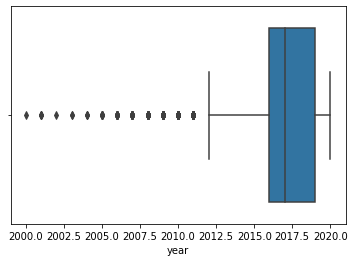

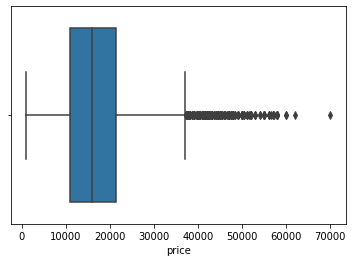

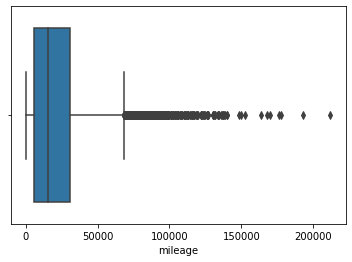

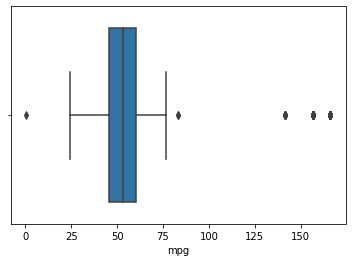

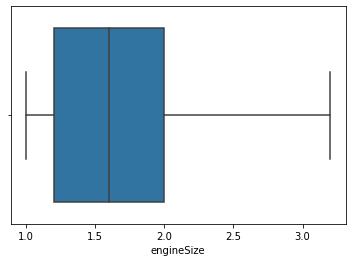

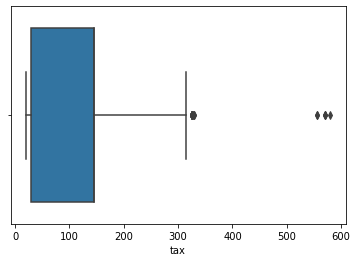

In [13]:
for numcolum in numerical_features :
  sns.boxplot(x=data_train[numcolum])
  plt.show()

Bila dilihat dari gambar diatas maka terdapat outliers sehingga perlu dilanjutkan ke tahap selanjutnya untuk mengatasi outliers pada fitur numerik

Melakukan IQR Method dalam menangani outliers pada fitur numerik

In [14]:
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)

IQR=Q3-Q1
data_train=data_train[~((data_train<(Q1-1.5*IQR))|(data_train>(Q3+1.5*IQR))).any(axis=1)]

data_train.shape

(13588, 9)

Mengecek dataset pada head

In [15]:
data_train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


# **Analisis Univariate EDA**

Analisis ini dilakukan pada fitur kategorikal dan numerikal.

## Categorical Features

Untuk fitur kategorikal yaitu model, fuelType, dan transmission. Dimana analisis terdiri dari kategori, jumlah sample dan persentase. Kemudian menampilkan grafik

### Fitur Model

In [16]:
count = data_train['model'].value_counts()
percent = 100*data_train['model'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df)
print('Total Model: ',len(data_train['model'].unique()))

                  jumlah sample  persentase
 Golf                      4167        30.7
 Polo                      3125        23.0
 Tiguan                    1716        12.6
 Up                         861         6.3
 Passat                     739         5.4
 T-Roc                      722         5.3
 Touran                     328         2.4
 T-Cross                    300         2.2
 Sharan                     253         1.9
 Arteon                     246         1.8
 Golf SV                    234         1.7
 Scirocco                   215         1.6
 Touareg                    188         1.4
 Amarok                      97         0.7
 Tiguan Allspace             89         0.7
 CC                          71         0.5
 Beetle                      69         0.5
 Shuttle                     60         0.4
 Caddy Maxi Life             59         0.4
 Jetta                       22         0.2
 Caddy Life                   8         0.1
 Caravelle                    8 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


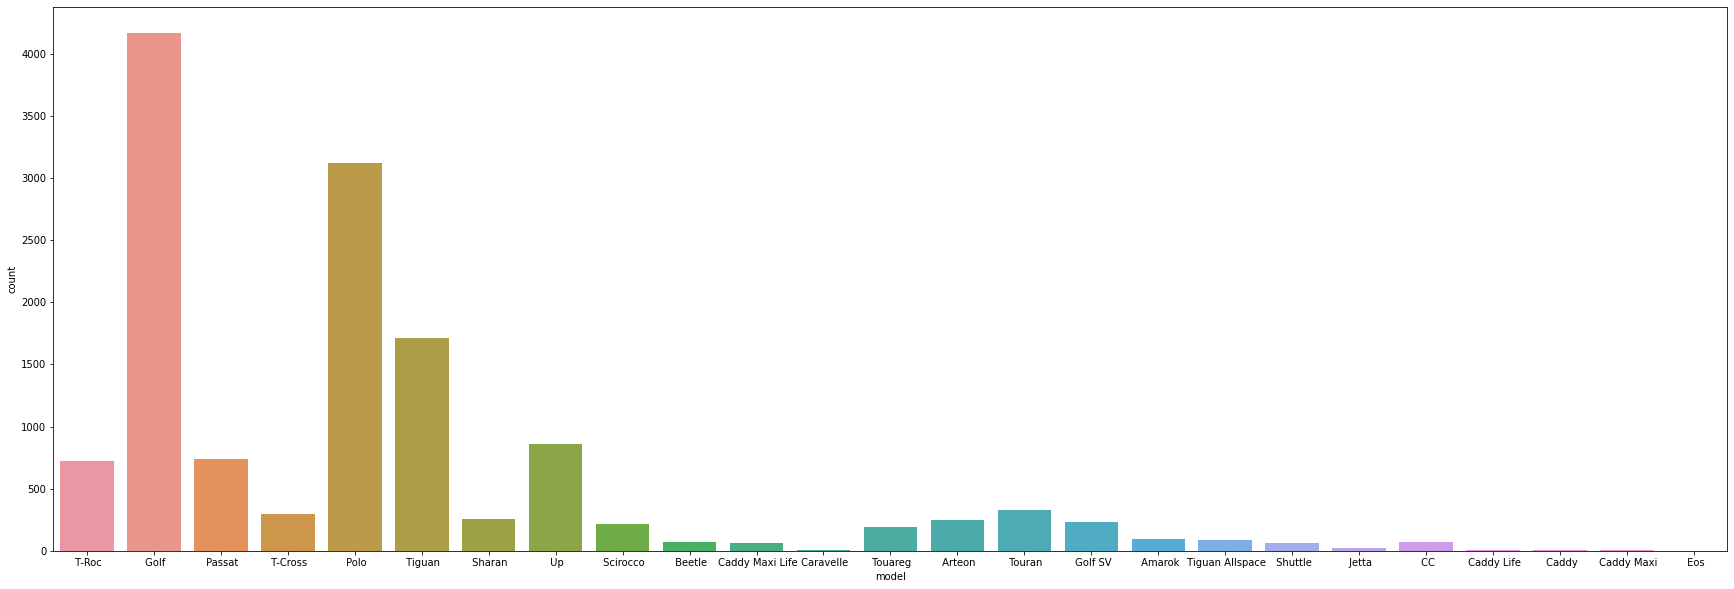

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(data_train['model'])
plt.show()

# Fitur Transmission

In [18]:
count = data_train['transmission'].value_counts()
percent = 100*data_train['transmission'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df)
print('Total Transmission: ',len(data_train['transmission'].unique()))

           jumlah sample  persentase
Manual              8421        62.0
Semi-Auto           3488        25.7
Automatic           1679        12.4
Total Transmission:  3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


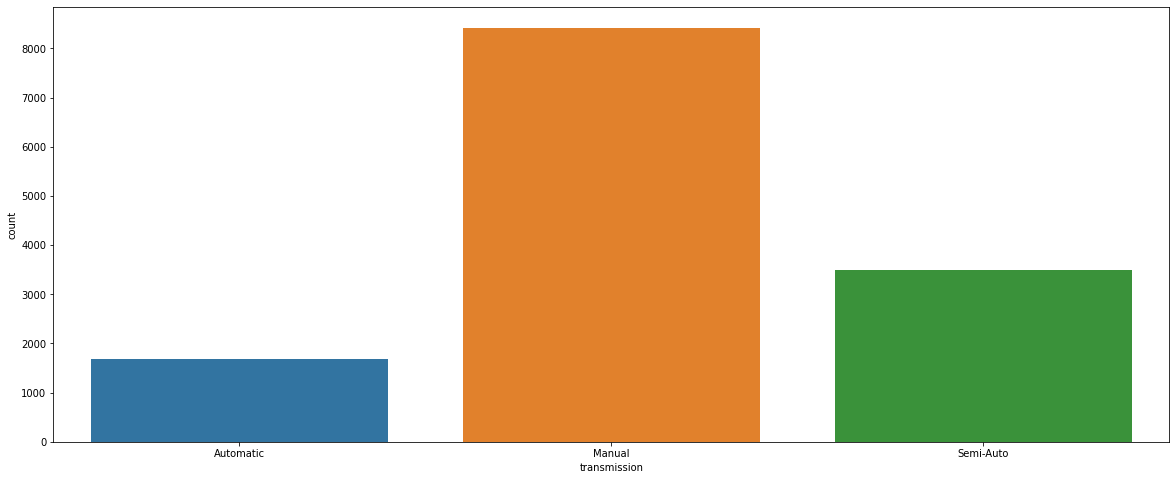

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(data_train['transmission'])
plt.show()

# Fitur Fuel Type

In [20]:
count = data_train['fuelType'].value_counts()
percent = 100*data_train['fuelType'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df)
print('Total Transmission: ',len(data_train['fuelType'].unique()))

        jumlah sample  persentase
Petrol           8268        60.8
Diesel           5189        38.2
Other              77         0.6
Hybrid             54         0.4
Total Transmission:  4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


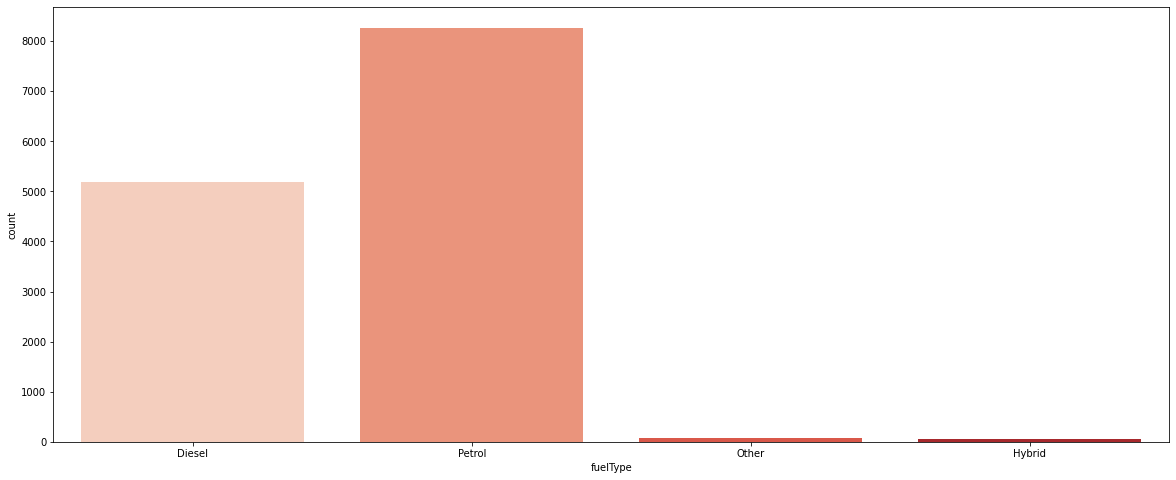

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(data_train['fuelType'], palette='Reds')
plt.show()

## Numerical Features

Pada analisis ini menampilkan histogram dari fitur numerik termasuk 'price' yang menjadi target

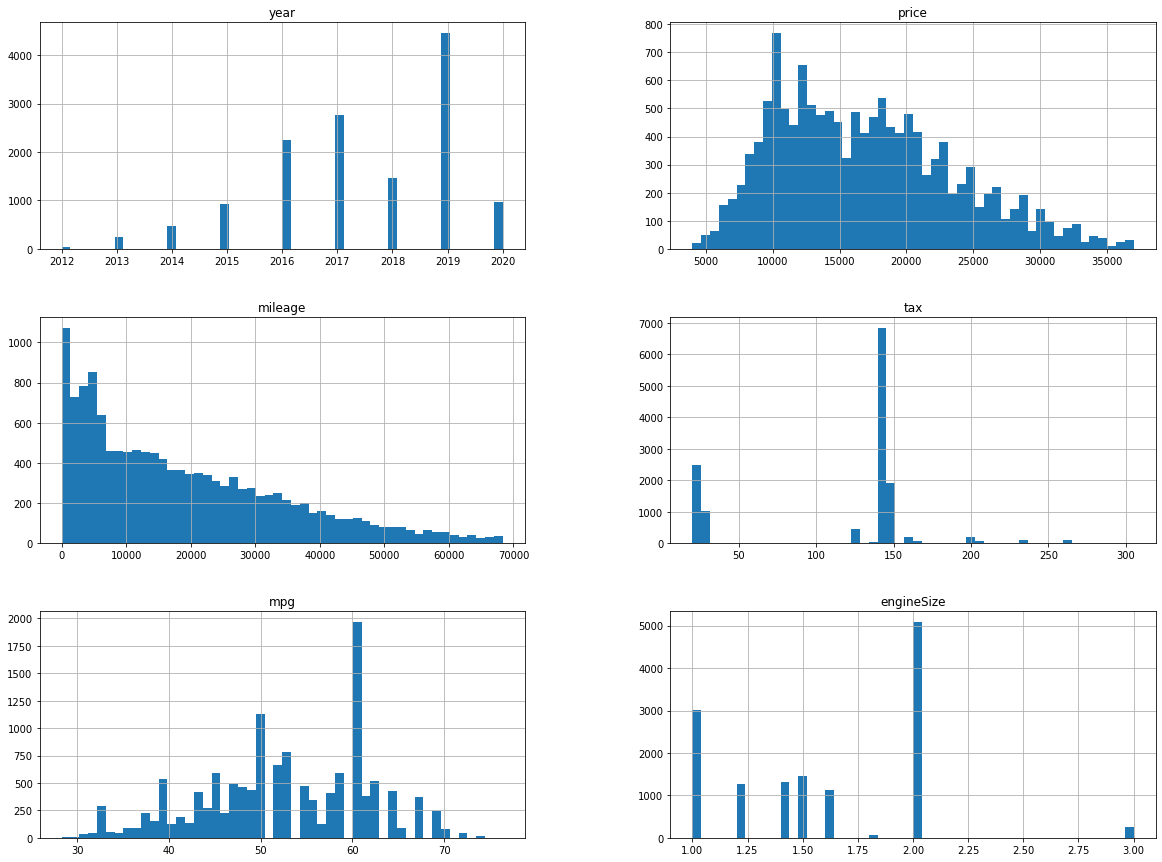

In [22]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

Bila dilihat dari histogram diatas yaitu 'price' dimana rentang 10.000-15.000(£) memiliki harga terbanyak bila dibandingkan dengan rentang harga lainnya

# **Analisis Multivariate EDA**

Pada analisis ini terdiri dari fitur kategori dan numerik

## Categorical Features

Pada fitur ini dilakukan analisis untuk mengamati rata-rata 'price' relatif terhadap fitur kategori. Yang bila dilihat dari gambar dibawah ini fitur kategori kurang memiliki pengaruh terhadp 'price'

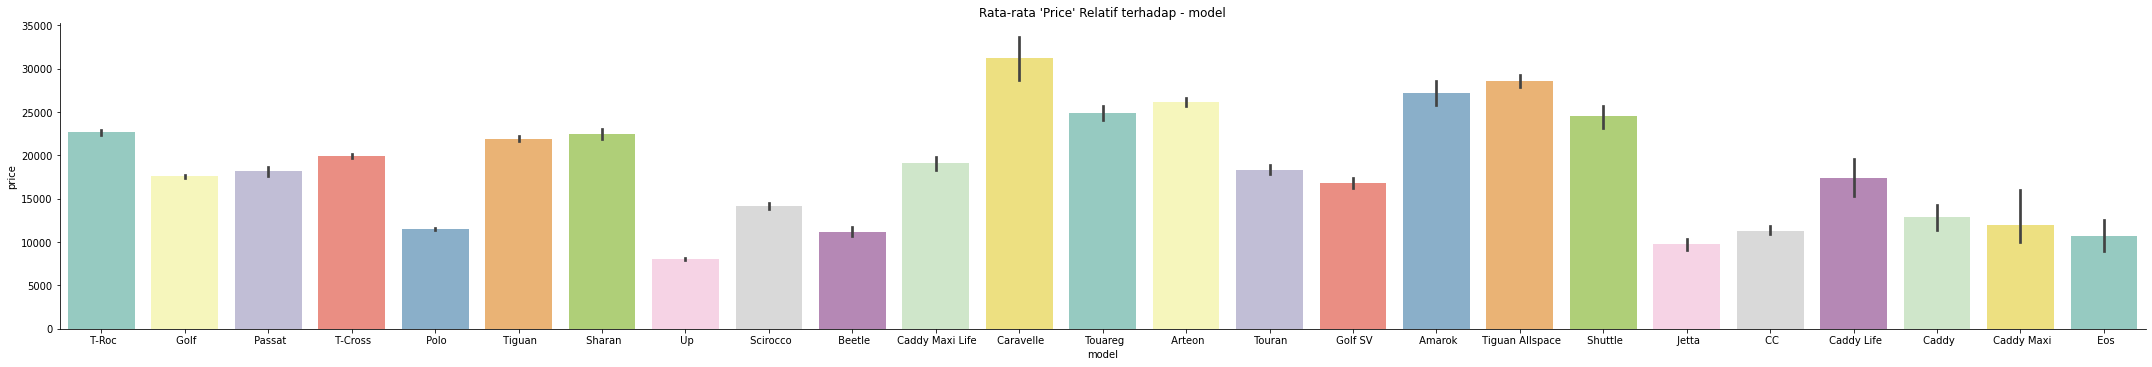

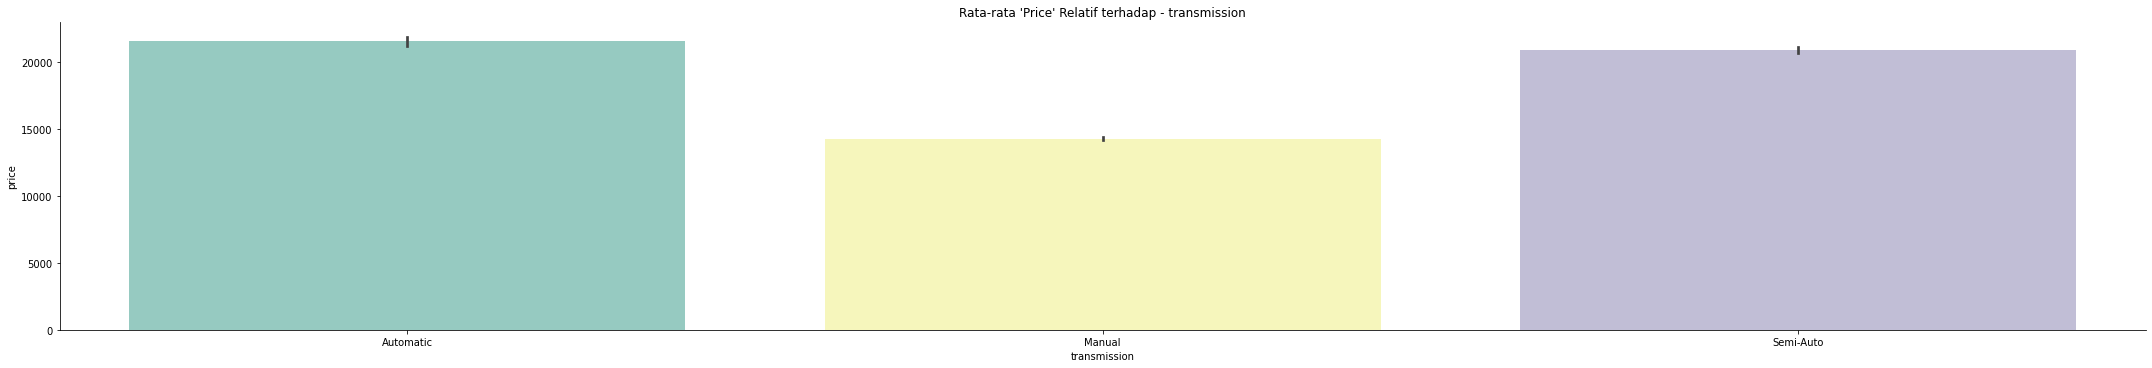

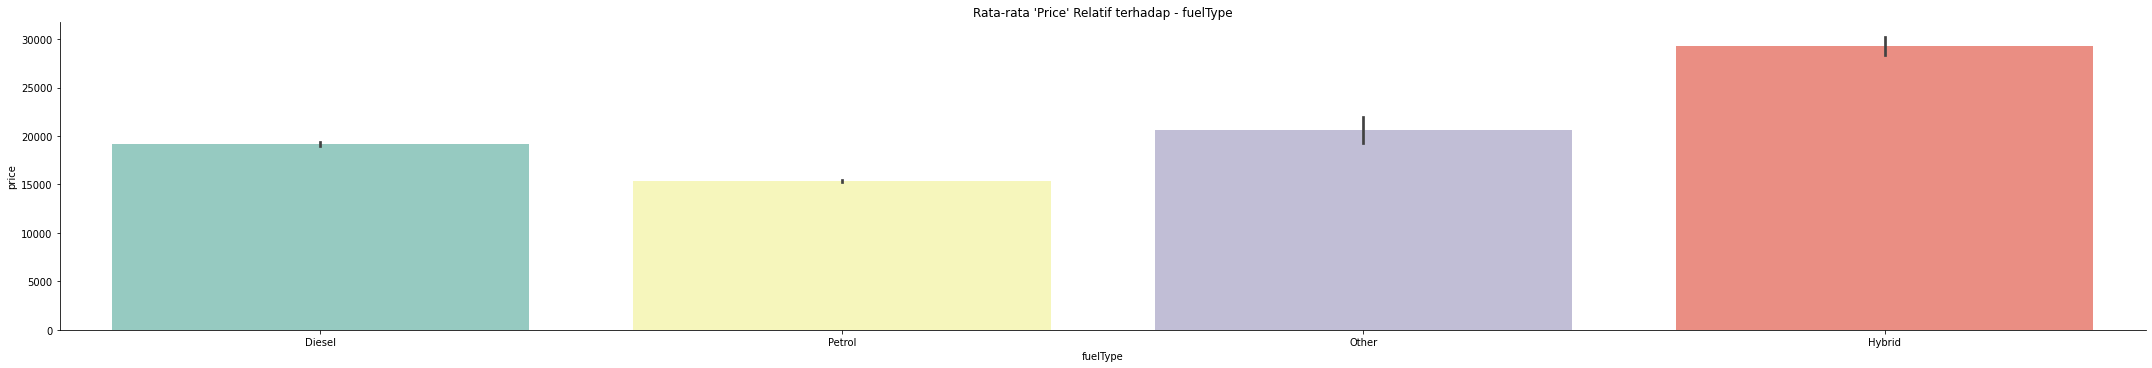

In [23]:
cat_features = data_train.select_dtypes(include='object').columns.to_list()
 
for numcolum in cat_features:
  sns.catplot(x=numcolum, y="price", kind="bar", dodge=False, height = 5, aspect = 6,  data=data_train, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(numcolum))

## Numerical Features

Pada analisis ini dilakukan untuk melihat korelasi antar fitur numerik dengan fitur target yaitu 'price'

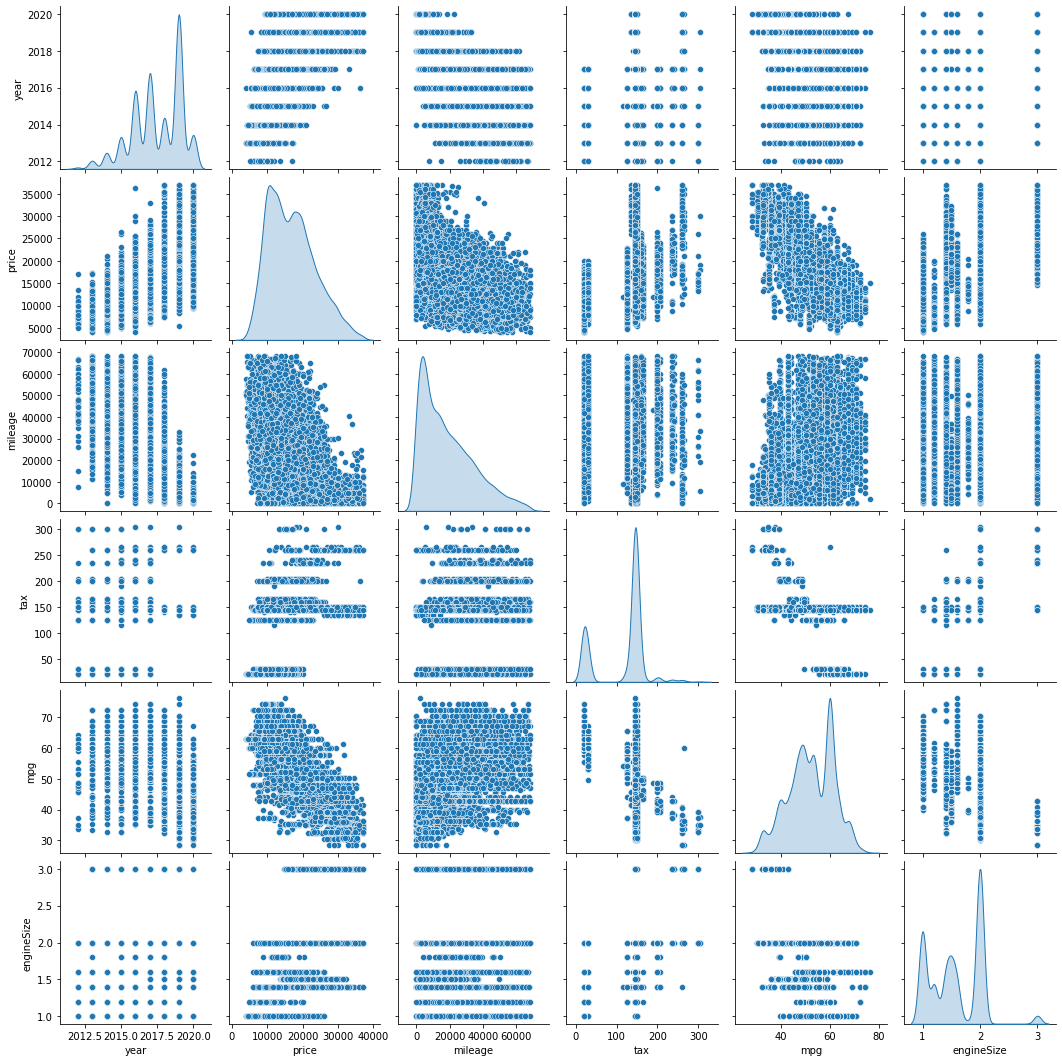

In [24]:
sns.pairplot(data_train, diag_kind = 'kde')

Bila dilihat dari gambar diatas maka relasi yang tinggi ada pada year, mileage dan mpg tetapi untuk tax dan engineSize memiliki relasi yang rendah

Untuk memastikan korelasi yang didapat tadi benar maka dapat mengeceknya dengan menggunakan fungsi corr().

Dan hasil yang terlihat pada correlation matrix ini yaitu mileage, tax, mpg dan engineSize yang memiliki skor korelasi tinggi dengan fitur target 'price'

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

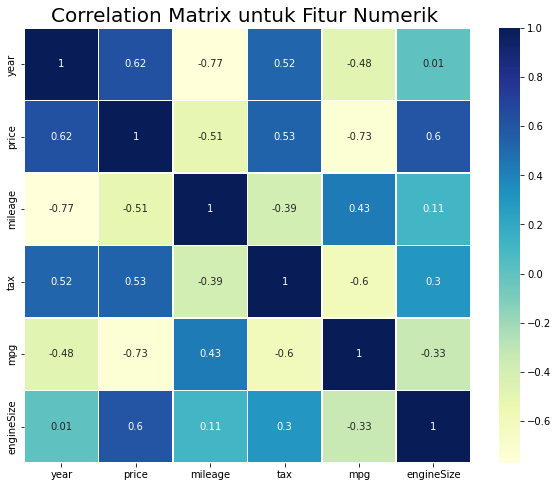

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_train.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Drop fitur year dikarenkan memiliki korelasi yang rendah

In [26]:
data_train.drop(['year'], inplace=True, axis=1)
data_train.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [27]:
len(data_train)

13588

# **Data Preparation**

pada persiapan data digunakan beberarap tahapan yaitu encoding, train_test_split dan standarisasi

## Encoding

Pada tahap ini melakukan teknik *one-hot-encoding* dimana menggunakan fitur kategori dikarenakan masih terdapat kategori sehingga harus diubah ke numerik terlebih dahulu

In [28]:
from sklearn.preprocessing import  OneHotEncoder
data_train = pd.concat([data_train, pd.get_dummies(data_train['model'], prefix='model', drop_first=False)],axis=1)
data_train = pd.concat([data_train, pd.get_dummies(data_train['transmission'], prefix='trans', drop_first=False)],axis=1)
data_train = pd.concat([data_train, pd.get_dummies(data_train['fuelType'], prefix='fuel', drop_first=False)],axis=1)

data_train.drop(['model'], axis=1, inplace=True)
data_train.drop(['transmission'], axis=1, inplace=True)
data_train.drop(['fuelType'], axis=1, inplace=True)
data_train.head()

,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ Caravelle,model_ Eos,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,trans_Automatic,trans_Manual,trans_Semi-Auto,fuel_Diesel,fuel_Hybrid,fuel_Other,fuel_Petrol
0,25000,13904,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


Menampilkan info data setelah dilakukannya *one-hot-encoding*

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13588 entries, 0 to 15150
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   13588 non-null  int64  
 1   mileage                 13588 non-null  int64  
 2   tax                     13588 non-null  int64  
 3   mpg                     13588 non-null  float64
 4   engineSize              13588 non-null  float64
 5   model_ Amarok           13588 non-null  uint8  
 6   model_ Arteon           13588 non-null  uint8  
 7   model_ Beetle           13588 non-null  uint8  
 8   model_ CC               13588 non-null  uint8  
 9   model_ Caddy            13588 non-null  uint8  
 10  model_ Caddy Life       13588 non-null  uint8  
 11  model_ Caddy Maxi       13588 non-null  uint8  
 12  model_ Caddy Maxi Life  13588 non-null  uint8  
 13  model_ Caravelle        13588 non-null  uint8  
 14  model_ Eos              13588 non-null

## Train_test_split

Dimana pada tahapan ini membagi dataset menjadi data latih dan data uji sebelum membuat model. Dimana proporsi pada train dan test yaitu 90:10

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
X = data_train.drop(["price"],axis =1)
y = data_train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 45)

Menampilkan jumlah total dataset, data latih, dan uji

In [31]:
print(f'Jumlah total dataset: {len(X)}')
print(f'Jumlah data latih pada dataset: {len(X_train)}')
print(f'Jumlah data uji pada dataset: {len(X_test)}')

Jumlah total dataset: 13588
Jumlah data latih pada dataset: 12229
Jumlah data uji pada dataset: 1359


## Standarisasi

Dimana pada tahapan ini mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. Pada tahapan ini menggunakan fitur numerik.

In [32]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['mileage', 'mpg', 'tax', 'engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,mileage,mpg,tax,engineSize
4422,2.430140,1.142310,-1.493746,0.945428
11120,1.905903,-0.314453,0.745440,0.945428
19,-0.878152,-1.395989,0.487072,-0.177170
4423,2.684624,0.093882,-1.493746,-0.401690
12740,-0.560047,0.204243,0.573195,-1.299769


Bila dilihat dari tabel dibawah ini bahwa nilai mean = 0 dan standar deviasi = 1.

In [33]:
X_train[numerical_features].describe().round(4)

,mileage,mpg,tax,engineSize
count,12229.0000,12229.0000,12229.0000,12229.0000
mean,0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.1962,-2.6651,-1.6660,-1.2998
25%,-0.8523,-0.6786,-1.4937,-0.8507
50%,-0.2419,0.0939,0.4871,-0.1772
75%,0.6245,0.8443,0.4871,0.9454
max,3.1519,2.6432,3.2430,3.1906


# **Modeling**

Pada tahap ini menggunakan 3 model yaitu Decission tree, Random Forest dan Boosting. Tahap ini melatih data training dan menyimpan data testing untuk dilatih di tahap evaluasi. Pada tahap model ini juga terdapat penggunaan hyperparameter tuning.


Pada tahap pertama menyiapkan data frame terlebih dahulu

In [34]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['DecisionTree', 'RandomForest', 'Boosting'])

## Model Decision Tree

Menggunakan teknik DecisionTreeRegressor dari library Scikitlearn


In [35]:
from sklearn.tree import DecisionTreeRegressor

dec =  DecisionTreeRegressor(max_depth=12, random_state=30)
dec.fit(X_train, y_train)
 
y_pred_dec= dec.predict(X_train)

# Model Random Forest

Menggunakan teknik RandomForestRegressor dari library Scikitlearn 

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=35, max_depth=12, random_state=50, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

# Model Boosting (AdaBoost)

Menggunakan teknik AdaBoostRegressor dari library Scikitlearn. 

In [37]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=35, learning_rate=0.05, random_state=30)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **Evaluation**

Pada tahap ini digunakan untuk mengevaluasi metrik yang digunakan. Dimana pada prediksi ini menggunakan metrik MSE yang digunakan untuk menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi

Pertama dilakukan scaling fitur numerik pada data uji dikarenakan proses scaling pada data latih telah dilakukan

In [38]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Melakukan evaluasi 3 model machine learning yaitu Decision tree, Random Forest dan Boosting dengan metrik MSE.

In [39]:
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting'])
model_dict = {'DecisionTree':dec, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
RF,1545.61,2660.75
Boosting,10778.9,10463.7
DecisionTree,1720.07,3709.12


Dari tabel diatas didapatkan bahwa yang memberikan nilai error terkecil yaitu Random Forest. Untuk memudahkannya dibuat plot metrik dengan *bar chart*. Dan setelah dilihat pada bar chart dibawah ini maka Random Forest menjadi model terbaik dalam melakukan prediksi harga jual mobil bekas VW

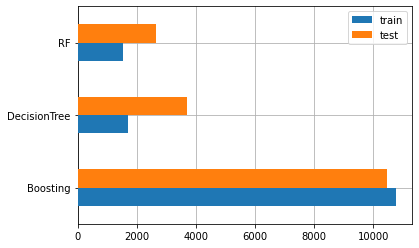

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Melakukan prediksi dari tiga model dengan data test

In [41]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(2)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_DecisionTree,prediksi_RF,prediksi_Boosting
4560,27989,26400.59,26576.07,26390.94


Dilihat dari prediksi bahwa prediksi yang paling mendekati yaitu random forest sehingga model yang dapat menjadi solusi baik dalam memprediksi harga jual mobil bekas VW yaitu *Random Forest*